In [1]:
import numpy as np
from numpy import linalg as LA

import cvxpy
import optim_tools #own file with helper

import control as pc
import matplotlib.pyplot as plt

from sysident import loadtools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print cvxpy.installed_solvers()

['CVXOPT', 'MOSEK', 'ECOS_BB', 'GLPK_MI', 'SCS', 'ECOS', 'GLPK', 'LS']


In [3]:
def add_position_state(A0, B0, C0):
    A = np.vstack((C0, A0))
    A = np.hstack((np.zeros((A.shape[0],1)), A))
    
    B = np.vstack((np.zeros((1, B0.shape[1])), B0))
    
    C = np.matrix(np.zeros(B.shape).T)
    C[0,0] = 1
    return A, B, C

#add_position_state(A, B, C)

def load_with_delay(fname):
    A, B, C, D = loadtools.getModel(fname)
    return A, B, C, D

def load_without_delay(fname):
    res, _ = loadtools.loadNPY(fname)
    return res['A'], res['B'], res['C'], res['D'], res['delay']

In [4]:
_Ax, _Bx, _Cx, D = load_with_delay('20180717-104039_poles3_ident_pade_0:032')
A, B, C = add_position_state(_Ax, _Bx, _Cx)

_A0x, _B0x, _C0x, D0, delay = load_without_delay('20180717-104039_poles2_ident_nodelay')
A0, B0, C0 = add_position_state(_A0x, _B0x, _C0x)

u_max = 2.0
U_max = [u_max]

X00 = [np.matrix([1.0, 1.0,  -0.5, -0.025]).T,
         np.matrix([1.0, 1.0,  -0.5,  0.025]).T,
         np.matrix([1.0, 1.0,   0.5, -0.025]).T,
         np.matrix([1.0, 1.0,   0.5,  0.025]).T,
         np.matrix([1.0, -1.0, -0.5, -0.025]).T,
         np.matrix([1.0, -1.0, -0.5,  0.025]).T,
         np.matrix([1.0, -1.0,  0.5, -0.025]).T,
         np.matrix([1.0, -1.0,  0.5,  0.025]).T,
         np.matrix([-1.0, 1.0,  -0.5, -0.025]).T,
         np.matrix([-1.0, 1.0,  -0.5,  0.025]).T,
         np.matrix([-1.0, 1.0,   0.5, -0.025]).T,
         np.matrix([-1.0, 1.0,   0.5,  0.025]).T,
         np.matrix([-1.0, -1.0, -0.5, -0.025]).T,
         np.matrix([-1.0, -1.0, -0.5,  0.025]).T,
         np.matrix([-1.0, -1.0,  0.5, -0.025]).T,
         np.matrix([-1.0, -1.0,  0.5,  0.025]).T,
      ]

X0 = X00

In [19]:
_Ax, _Bx, _Cx, D = load_with_delay('20180717-104106_poles2_ident_pade_0:036')
A, B, C = add_position_state(_Ax, _Bx, _Cx)

_A0x, _B0x, _C0x, D0, delay = load_without_delay('20180717-104106_poles1_ident_nodelay')
A0, B0, C0 = add_position_state(_A0x, _B0x, _C0x)

u_max = 2.0
U_max = [u_max]

X00 = [np.matrix([ 1.0, -0.5, -0.025]).T,
       np.matrix([ 1.0, -0.5,  0.025]).T,
       np.matrix([ 1.0,  0.5, -0.025]).T,
       np.matrix([ 1.0,  0.5,  0.025]).T,
       np.matrix([ -1.0, -0.5, -0.025]).T,
       np.matrix([ -1.0, -0.5,  0.025]).T,
       np.matrix([ -1.0,  0.5, -0.025]).T,
       np.matrix([ -1.0,  0.5,  0.025]).T,
      ]

X0 = X00

In [5]:
def pt1_d1():
    
    #################################
    # Roboter pt2+pos (ohne delay)  #
    # Velocity output               #
    #################################

    A_ = np.matrix([[-10.30927835]])

    B_ = np.matrix([[10.30299916]])

    C_ = np.matrix([1.])

    D0 = np.matrix([0])
    
    #################################
    # Roboter pt1+pos (ohne delay)  #
    # Position output               #
    #################################
    A0, B0, C0 = add_position_state(A_, B_, C_)
    
    #################################
    # Roboter pt1 (mit delay)       #
    # Velocity output               #
    #################################
    A_ = np.matrix([[ 5.32907052e-15,  5.72737686e+01],
                    [-1.00000000e+01, -6.58648339e+01]])

    B_ = np.matrix([[5.72388842],
                    [1.03029992]])

    C_ = np.matrix([[  0., -10.]])

    D = np.matrix([[0.]])
                   
    #################################
    # Roboter pt1+pos (mit delay)   #
    # Position output               #
    #################################
    A, B, C = add_position_state(A_, B_, C_)
    
    u_max = 2.0
    U_max = [u_max]

    #n = len(b)

    delay = 0.036

    X00 = [np.matrix([ 1.0,   0.5]).T,
           np.matrix([ 1.0,  -0.5]).T,
           np.matrix([ -1.0,  0.5]).T,
           np.matrix([ -1.0, -0.5,5]).T
          ]

    X0 = X00
    return A0, B0, C0, D0, A, B, C, D, u_max, U_max, delay, X0



In [6]:
def pt2_d1_cmplx():
    #################################
    # Roboter pt2+pos (ohne delay)  #
    # Position output               #
    #################################

    A0 = np.matrix([[ 0,  0.,         -10],
                    [ 0,  0.,         -55.99932527],
                    [ 0, 10.,         -43.64272128]])

    B0 = np.matrix([[0],
                   [-5.58731344],
                   [ 0.        ]])

    C0 = np.matrix([ 1., 0.,  0.])

    D0 = np.matrix([0])
    u_max = 2.0
    U_max = [u_max]

    #n = len(b)

    delay = 0.032

    X00 = [np.matrix([ 1.0, -0.5, -0.025]).T,
           np.matrix([ 1.0, -0.5,  0.025]).T,
           np.matrix([ 1.0,  0.5, -0.025]).T,
           np.matrix([ 1.0,  0.5,  0.025]).T,
           np.matrix([ -1.0, -0.5, -0.025]).T,
           np.matrix([ -1.0, -0.5,  0.025]).T,
           np.matrix([ -1.0,  0.5, -0.025]).T,
           np.matrix([ -1.0,  0.5,  0.025]).T,

          ]

    X0 = X00

    ################################
    # Roboter pt2d+pos (mit delay) #
    ################################

    A = np.matrix([[ 0,  0,    0,   -1        ],
                   [ 0,  0,    0,   35        ],
                   [ 0, 10,    0,   32.8766333],
                   [ 0, 0, -100, -106.142721 ]])

    b = np.matrix([[0], [34.92070901], [-5.58731344], [ 0.]])
    B = b

    c = np.matrix([ 1., 0.,  0., 0.])
    C = c

    d = np.matrix([0])
    D = d
    u_max = 2.0
    U_max = [u_max]

    #n = len(b)

    X00 = [np.matrix([1.0, 1.0,  -0.5, -0.025]).T,
             np.matrix([1.0, 1.0,  -0.5,  0.025]).T,
             np.matrix([1.0, 1.0,   0.5, -0.025]).T,
             np.matrix([1.0, 1.0,   0.5,  0.025]).T,
             np.matrix([1.0, -1.0, -0.5, -0.025]).T,
             np.matrix([1.0, -1.0, -0.5,  0.025]).T,
             np.matrix([1.0, -1.0,  0.5, -0.025]).T,
             np.matrix([1.0, -1.0,  0.5,  0.025]).T,
             np.matrix([-1.0, 1.0,  -0.5, -0.025]).T,
             np.matrix([-1.0, 1.0,  -0.5,  0.025]).T,
             np.matrix([-1.0, 1.0,   0.5, -0.025]).T,
             np.matrix([-1.0, 1.0,   0.5,  0.025]).T,
             np.matrix([-1.0, -1.0, -0.5, -0.025]).T,
             np.matrix([-1.0, -1.0, -0.5,  0.025]).T,
             np.matrix([-1.0, -1.0,  0.5, -0.025]).T,
             np.matrix([-1.0, -1.0,  0.5,  0.025]).T,
          ]

    X0 = X00

    print "Poles:\n", pc.pole(pc.ss(A, B, C, D))
    print "Zeros:\n", pc.zero(pc.ss(A, B, C, D))

    #plt.plot(*pc.step_response(pc.ss(A, b, c, d)))

    #plt.plot(*pc.step_response(pc.ss(A0, b0, c0, d0)))
    return A0, B0, C0, D0, A, B, C, D, u_max, U_max, delay, X0

A0, B0, C0, D0, A, B, C, D, u_max, U_max, delay, X0 = pt2_d1_cmplx()

Poles:
[  0.        +0.        j -21.82123949+9.15594554j
 -21.82123949-9.15594554j -62.50024202+0.        j]
Zeros:
[-1.40209274e+08  1.40209067e+08  6.25000000e+01]


In [7]:
def pt2_d1_real():
    #################################
    # Roboter pt2+pos (ohne delay)  #
    # Position output               #
    #################################

    A0 = np.matrix([[ 0,  0.,         -10],
                    [ 0,  0.,         -55.99932527],
                    [ 0, 10.,         -43.64272128]])

    B0 = np.matrix([[0],
                   [-5.58731344],
                   [ 0.        ]])

    C0 = np.matrix([ 1., 0.,  0.])

    D0 = np.matrix([0])
    u_max = 2.0
    U_max = [u_max]

    #n = len(b)

    delay = 0.032

    X00 = [np.matrix([ 1.0, -0.5, -0.025]).T,
           np.matrix([ 1.0, -0.5,  0.025]).T,
           np.matrix([ 1.0,  0.5, -0.025]).T,
           np.matrix([ 1.0,  0.5,  0.025]).T,
           np.matrix([ -1.0, -0.5, -0.025]).T,
           np.matrix([ -1.0, -0.5,  0.025]).T,
           np.matrix([ -1.0,  0.5, -0.025]).T,
           np.matrix([ -1.0,  0.5,  0.025]).T,

          ]

    X0 = X00

    ###########################
    # another set of          #
    # Roboter pt2d + pos      #
    ###########################

    A = np.matrix([[ 0., 0.,  0.,   -1.       ],
                   [ 0., 0.,  0,    22.7272727],
                   [ 0., 10,  0,    24.4318182],
                   [ 0., 0, -100, -86.3636364]])

    B = np.matrix([[0],
                   [22.72727273],
                   [-6.25      ],
                   [ 0.        ]])

    C = np.matrix([[ 1.,  0., 0., 0.]])

    D = np.matrix([[ 0. ]])

    u_max = 2.0
    U_max = [u_max]

    n = len(B)

    X00 = [np.matrix([1.0, 1.0,  -0.5, -0.025]).T,
             np.matrix([1.0, 1.0,  -0.5,  0.025]).T,
             np.matrix([1.0, 1.0,   0.5, -0.025]).T,
             np.matrix([1.0, 1.0,   0.5,  0.025]).T,
             np.matrix([1.0, -1.0, -0.5, -0.025]).T,
             np.matrix([1.0, -1.0, -0.5,  0.025]).T,
             np.matrix([1.0, -1.0,  0.5, -0.025]).T,
             np.matrix([1.0, -1.0,  0.5,  0.025]).T,
            np.matrix([-1.0, 1.0,  -0.5, -0.025]).T,
             np.matrix([-1.0, 1.0,  -0.5,  0.025]).T,
             np.matrix([-1.0, 1.0,   0.5, -0.025]).T,
             np.matrix([-1.0, 1.0,   0.5,  0.025]).T,
             np.matrix([-1.0, -1.0, -0.5, -0.025]).T,
             np.matrix([-1.0, -1.0, -0.5,  0.025]).T,
             np.matrix([-1.0, -1.0,  0.5, -0.025]).T,
             np.matrix([-1.0, -1.0,  0.5,  0.025]).T,
          ]

    X0 = X00


    print "Poles:\n", pc.pole(pc.ss(A, B, C, D))
    print "Zeros:\n", pc.zero(pc.ss(A, B, C, D))
    #plt.plot(*pc.step_response(pc.ss(A, b, c, d)))

    #plt.plot(*pc.step_response(pc.ss(A0, b0, c0, d0)))
    return A0, B0, C0, D0, A, B, C, D, u_max, U_max, delay, X0

A0, B0, C0, D0, A, B, C, D, u_max, U_max, delay, X0 = pt2_d1_real()

Poles:
[  0.         -24.99790258 -25.00209781 -36.36363601]
Zeros:
[-1.48291074e+08  1.48291006e+08  3.63636364e+01]


In [20]:
## Helper functions for optimization problem

def Tri(i, n_u):
    if n_u>1:
        print "not implemented"
        print "alle permutationen mit einsen auf der hauptdiagonalen!"
        raise Error()
        
    if i==1:
        return np.eye(n_u)
    else:
        # only true for n_u == 1
        return np.zeros((n_u, n_u))

def negTri(i, n_u):
    return np.eye(n_u) - Tri(i, n_u)


In [21]:
#%%time
# Satz 6.6

# Init
n = B.shape[0] # get dim of system
n_u = B.shape[1] 

# Variables
X = cvxpy.Semidef(n)
Y = cvxpy.Semidef(n)
W = cvxpy.Variable(n_u)

Ak_h = cvxpy.Semidef(*A.shape)
Bk_h = cvxpy.Variable(*B.shape)
Ck_h = cvxpy.Variable(*C.shape)
Dk_h = cvxpy.Variable(*D.shape)

Ch = cvxpy.Variable(*C.shape)
Dh = cvxpy.Variable(*D.shape)

# Substitutionen
C_hat = lambda i: Tri(i, n_u)*Ck_h + negTri(i, n_u)*Ch
D_hat = lambda i: Tri(i, n_u)*Dk_h + negTri(i, n_u)*Dh

Xi = cvxpy.bmat([[ A*X + B*Ck_h, A + B*Dk_h*C ],
                 [ Ak_h,         Y*A + Bk_h*C ]])

I = np.eye(n)

# Bisection parameter
g = cvxpy.Parameter(sign='positive')

# Pole restriction
ro = cvxpy.Parameter(sign='positive') # Real <=-ro
ni = cvxpy.Parameter(sign='positive') # |Imag| <= ni*Real

ro.value = 50
ni.value = 10

# Define Constraints

# (6.39a)
const_639a = cvxpy.bmat([[X, I],
                         [I, Y]]) >> 0
                         #[I, Y]]) == cvxpy.Semidef(2*n)



# (6.39b)
const_639b = cvxpy.bmat([[ X*A.T + A*X + B*Ck_h + (B*Ck_h).T, Ak_h.T + A + B*Dk_h*C            ],
                         [ cvxpy.Variable(n, n),          A.T*Y + Y*A + Bk_h*C + (Bk_h*C).T]]) + \
             2*g*cvxpy.bmat([[X, I],
                             [I, Y]]) << 0
                             #[I, Y]]) == -cvxpy.Semidef(2*n)
    
# (6.39c)
const_639c = [cvxpy.bmat([[ X*A.T + A*X + B*C_hat(i) + (B*C_hat(i)).T, Ak_h.T + A + B*D_hat(i)*C            ],
                          [ cvxpy.Variable(n, n),                      A.T*Y + Y*A + Bk_h*C + (Bk_h*C).T]]) << 0 for i in range(2, (2**n_u)+1)]
                          #[ cvxpy.Variable(n, n),                      A.T*Y + Y*A + Bk_h*C + (Bk_h*C).T]]) == -cvxpy.Semidef(2*n) for i in range(2, (2**n_u)+1)]
    
    
# (6.39d)
const_639d = cvxpy.bmat([[ X,  I,    Ch.T     ],
                         [ I,  Y,    (Dh*C).T ],
                         [ Ch, Dh*C, W        ]]) >> 0
                         #[ Ch, Dh*C, W        ]]) == cvxpy.Semidef(2*n+n_u)

const_639e = [W[j,j] <= U_max[j]**2 for j in range(0, n_u)]

const_639f = [ X0[k].T*Y*X0[k] <= 1.0
                            for k in range(0, len(X0))]

const_621a = Xi.T + Xi + ro*cvxpy.bmat([[X, I],
                                        [I, Y]]) >> 0
                                        #[I, Y]]) == cvxpy.Semidef(2*n)

const_621b = cvxpy.bmat([[ ni*(Xi.T + Xi), Xi.T - Xi ],
                         [ -Xi.T + Xi,     ni*(Xi.T + Xi) ]]) << 0
                         #[ -Xi.T + Xi,     ni*(Xi.T + Xi) ]]) == -cvxpy.Semidef(4*n)

# Collect all constraints
constraints_639 = []
constraints_639.append(const_639a)
constraints_639.append(const_639b)
constraints_639.extend(const_639c)
constraints_639.append(const_639d)
constraints_639.extend(const_639e)
constraints_639.extend(const_639f)

constraints_639.append(const_621a)
constraints_639.append(const_621b)


# Form problem.
prob_66 = cvxpy.Problem(cvxpy.Minimize(0), constraints_639)

# bisection with one solver
#[[X_o, Y_o, W_o,
#  Ak_h_o, Bk_h_o, Ck_h_o, Dk_h_o,
#  Ch_o, Dh_o], g_o] = optim_tools.bisect_max(0, None, prob_66, g, [X, Y, W, Ak_h, Bk_h, Ck_h, Dk_h, Ch, Dh], bisect_verbose=True,
#                                                      bisection_tol=0.01,
#                                                      #solver=cvxpy.CVXOPT, verbose=False,  max_iters=50000)
#                                                      solver=cvxpy.MOSEK, verbose=False)
#                                                      #solver=cvxpy.SCS, max_iters=50000)

# bisection alternative with list of multiple solvers
[[X_o, Y_o, W_o,
  Ak_h_o, Bk_h_o, Ck_h_o, Dk_h_o,
  Ch_o, Dh_o], g_o] = optim_tools.bisect_max2(0, None, prob_66, g, [X, Y, W, Ak_h, Bk_h, Ck_h, Dk_h, Ch, Dh],
                                                      bisect_verbose=True,
                                                      bisection_tol=0.01,
                                                      solvers=[
                                                               (cvxpy.MOSEK, {'verbose':False}),
                                                               (cvxpy.CVXOPT, {'verbose':False}),
                                                               (cvxpy.SCS, {'max_iters':2000, 'warm_start':True, 'verbose':True})
                                                              ])
print "g:", g_o

print
print '-----------------------'

processing upper bound: 1.0
 -----> Exception by MOSEK: cannot reshape array of size 0 into shape (6,6)
processing upper bound: 2.0
 -----> Exception by MOSEK: cannot reshape array of size 0 into shape (6,6)
processing upper bound: 4.0
 -----> Exception by MOSEK: cannot reshape array of size 0 into shape (6,6)
processing upper bound: 8.0
 -----> Exception by MOSEK: Solver 'MOSEK' failed. Try another solver.
processing upper bound: 16.0
found bounds: [8.0-16.0]
 -----> Exception by MOSEK: Solver 'MOSEK' failed. Try another solver.
bisect tol: 8.0
Range: 8.0-16.0; parameter 12.0 -> infeasible
bisect tol: 4.0
 -----> Exception by MOSEK: Solver 'MOSEK' failed. Try another solver.
Range: 8.0-12.0; parameter 10.0 -> optimal
bisect tol: 2.0
Range: 10.0-12.0; parameter 11.0 -> infeasible
bisect tol: 1.0
 -----> Exception by MOSEK: Solver 'MOSEK' failed. Try another solver.
Range: 10.0-11.0; parameter 10.5 -> optimal
bisect tol: 0.5
 -----> Exception by MOSEK: Solver 'MOSEK' failed. Try another

In [22]:
# QR Decomposition for M and N
M, NT = LA.qr(I - X_o.dot(Y_o))
N = NT.T
#assert(np.allclose(I - X_o.dot(Y_o), M.dot(N.T)))

# Reconstruction
Ek = -LA.solve(N, Y_o.dot(B))
Dk = np.matrix(Dk_h_o)

Ck = LA.solve(M, (Ck_h_o - Dk.dot(C).dot(X_o)).T).T
#Ck_1 = (Ck_h_o - Dk.dot(C).dot(X_o)).dot(LA.inv(M).T) #Check
#assert(np.allclose(Ck_1, Ck))

Bk = LA.solve(N, Bk_h_o)

temp_alpha = LA.solve(N, (Ak_h_o-Y_o.dot(A).dot(X_o)))
temp_beta = Bk.dot(C).dot(X_o)
Ak = (LA.solve(M, temp_alpha.T) - LA.solve(M, temp_beta.T)).T

#Ak_1 = LA.solve(N, (Ak_h_o-Y_o.dot(A).dot(X_o))).dot(LA.inv(M).T) - Bk.dot(C).dot(X_o).dot(LA.inv(M).T) #Check
#assert(np.allclose(Ak_1, Ak))


In [23]:
print Ak
print Bk
print Ck
print Dk
print Ek
print u_max
#print dT
print
print A
print B
print C
print D

[[-2.26764449e+01  1.99788127e-02  4.21373024e-02]
 [-5.38439165e+03 -3.38526279e+00  1.87774433e+01]
 [-1.34026738e+05 -7.46016388e+01 -1.99791607e+02]]
[[-3.66863610e-03]
 [-1.61083092e+00]
 [-4.21906815e+01]]
[[64967.63680424   203.7142123    420.79972043]]
[[21.0364528]]
[[ 1.60242221e-04]
 [-1.00953823e-01]
 [ 4.79894269e-01]]
2.0

[[ 0.00000000e+00  0.00000000e+00 -1.00000000e+01]
 [ 0.00000000e+00  5.32907052e-15  5.72737686e+01]
 [ 0.00000000e+00 -1.00000000e+01 -6.58648339e+01]]
[[0.        ]
 [5.72388842]
 [1.03029992]]
[[1. 0. 0.]]
[[0.]]


In [24]:
import time

poles = pc.pole(pc.ss(A, B, C, D))
#print pc.zero(pc.ss(A, B, C, D))

fname = '{}_poles{}_control'.format(time.strftime("%Y%m%d-%H%M%S"),
                                    len(poles))

loadtools.saveModel(fname, A, B, C, D)
loadtools.saveControl(fname, Ak, Bk, Ck, Dk, Ek, u_max)

print
print 'Model:'
print loadtools.getModel(fname)
print 'Control:'
print loadtools.getControl(fname)

Creating new file: 20180717-113847_poles3_control.npy

Model:
(matrix([[ 0.00000000e+00,  0.00000000e+00, -1.00000000e+01],
        [ 0.00000000e+00,  5.32907052e-15,  5.72737686e+01],
        [ 0.00000000e+00, -1.00000000e+01, -6.58648339e+01]]), matrix([[0.        ],
        [5.72388842],
        [1.03029992]]), matrix([[1., 0., 0.]]), matrix([[0.]]))
Control:
(matrix([[-2.26764449e+01,  1.99788127e-02,  4.21373024e-02],
        [-5.38439165e+03, -3.38526279e+00,  1.87774433e+01],
        [-1.34026738e+05, -7.46016388e+01, -1.99791607e+02]]), matrix([[-3.66863610e-03],
        [-1.61083092e+00],
        [-4.21906815e+01]]), matrix([[64967.63680424,   203.7142123 ,   420.79972043]]), matrix([[21.0364528]]), matrix([[ 1.60242221e-04],
        [-1.00953823e-01],
        [ 4.79894269e-01]]), 2.0)


In [25]:
from numpy.linalg import solve, inv

def control_func(y, s, x, k, A, b, c):
    N = -c.dot(solve(A-b.dot(k.T), b))
    u = solve(N, np.array([s]))-k.T.dot(x)
    return u

class control_func_dyn_out():
    def __init__(self, Ak, Bk, Ck, Dk, Ek, A, B, C, D, umax=None, dT=1e-3):
        self.Ak = Ak
        self.Bk = Bk
        self.Ck = Ck
        self.Dk = Dk
        self.Ek = Ek
        self.umax = umax
        self.dT = dT

        self.z = np.zeros(B.shape)
                
        # Construct Prefilter
        C2 = np.hstack((-C, np.zeros(Ck.shape)))

        A2_u = np.hstack(((A+B.dot(Dk).dot(C)), B.dot(Ck)))
        A2_d = np.hstack((Bk.dot(C), Ak))

        A2 = np.vstack((A2_u, A2_d))
        B2 = np.vstack((B, np.zeros(Bk.shape)))

        self.N = inv(C2.dot(inv(A2)).dot(B2))
        #print self.N
        
    def estimate(self, y, u):
        # already saturated in this case
        #if self.umax is not None:
        #    u = optim_tools.sat(u, self.umax)
        
        z_dot = self.Ak.dot(self.z) + self.Bk.dot(y) + self.Ek.dot(u)
        return self.z + z_dot*self.dT
        
    def regulate(self, y, s, x):
        u = self.N.dot(s)+self.Ck.dot(self.z) + self.Dk.dot(y)

        # Saturate 
        if self.umax is not None:
            u = optim_tools.sat(u, self.umax)
            
        self.z = self.estimate(y, u)
        return u

In [26]:
# Timeline
T = np.arange(0, 1.5, 1e-3) 

#s: input, e.g., step function with amplitude of 0.2
#s = np.zeros(len(T));
s = np.ones(len(T))*0.1;


# Initial state
x0 = np.zeros(B.shape)

In [27]:
from functools import partial

y0, u0, u0_sat = optim_tools.simulate(A, B, C, D, 
                                   partial(optim_tools.openLoop),
                                   s, T, delay=None, umax=u_max, x0=x0)

y1, u1, u1_sat = optim_tools.simulate(A, B, C, D, 
                                   control_func_dyn_out(Ak, Bk, Ck, Dk, Ek,
                                                        A, B, C, D,
                                                        umax=u_max).regulate,
                                   s, T, delay=None, umax=u_max, x0=x0)


In [28]:

y2, u2, u2_sat = optim_tools.simulate(A0, B0, C0, D0, 
                                   control_func_dyn_out(Ak, Bk, Ck, Dk, Ek,
                                                        A, B, C, D,
                                                        umax=u_max).regulate,
                                   s, T, delay=delay, umax=u_max, x0=np.zeros(B0.shape))


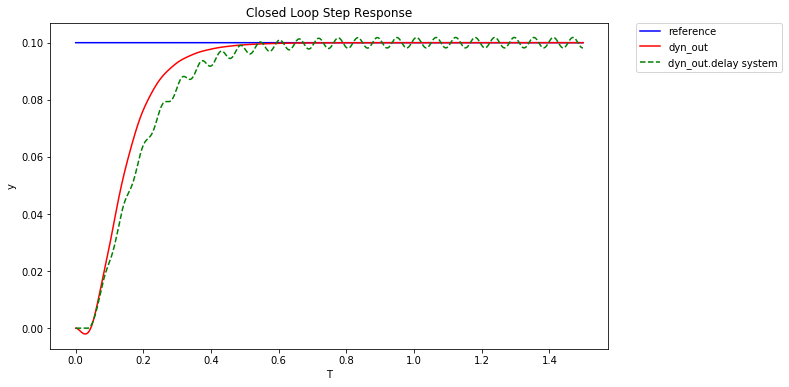

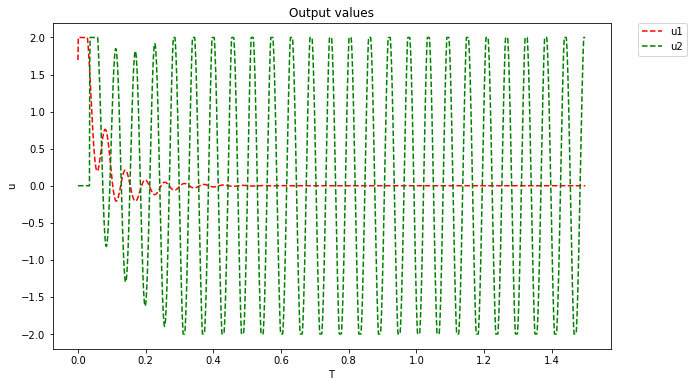

In [29]:
pylab.rcParams['figure.figsize'] = (10, 6)

line_s, = plt.plot(T[:], s, 'b', label='reference')
line0, = plt.plot(T[:], np.array(y1[0,:].T), 'r', label='dyn_out')
line1, = plt.plot(T[:], np.array(y2[0,:].T), 'g--', label='dyn_out.delay system')


#first_legend = plt.legend(handles=[line1], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('y')
plt.title('Closed Loop Step Response')
plt.show()


line0, = plt.plot(T, u1, 'r--', label='u1')
line2, = plt.plot(T, u2, 'g--', label='u2')



#>first_legend = plt.legend(handles=[line1, line2, line1b, line2b], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('u')
plt.title('Output values')
plt.show()
